In [2]:
# ---------------------------------------------- Word2Vec 성별 모델 저장 ---------------------------------------------- #

# Word2Vec 모델 생성해야 실행 가능

# ---------------------------------------------- Word2Vec 성별 모델 저장 ---------------------------------------------- #

# 데이터 관련
import pandas as pd
import numpy as np

#시간 측정용
from tqdm import tqdm

# ----------------------- 한글 ----------------------- #
import MeCab
mec = MeCab.Tagger()

# 점수 게산
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Tokenizer , Word2Vec
from keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec

import collections
import os
import math

# Word2Vec 그래프
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
# 폰트 깨짐 수정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

Using TensorFlow backend.


In [3]:
# ----------------------- 정규표현식 ----------------------- #
import re
is_ProductName = re.compile("[a-zA-Z0-9]+")

def MCSplit(keyword):
    ret = []
    for i in keyword.split("\n"):
        app = i.split("\t")[0]
        if app != 'EOS':
            ret.append(app)
        else:
            return ret
    return ret
def subSChar(keyword):
    ret = re.sub("[-=+,.!@#$%^&*(\)[\]<\>{\}\'\"/_|ㄱ-ㅎ|ㅏ-ㅣ]"," ",keyword)
    return ret
def KoEnMorphs(keyword):
    x = (subSChar(keyword.lower())).split()
    for i in range(0,len(x)):
        for j in is_ProductName.findall(x[i]):
            x[i] = x[i].replace(j," " + j + " ")
    x = (" ".join(x)).split()
    ret = []
    for i in x:
        if is_ProductName.fullmatch(i) == None:
            ret += MCSplit(mec.parse((i)))
        else:
            ret.append(i)
    return ret

In [4]:
cus = pd.read_csv("./Data/제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv")
age1020 = cus[cus["clnt_age"].isin(["10","20"])]
age30 = cus[cus["clnt_age"]=="30"]
age40 = cus[cus["clnt_age"]=="40"]
age5060 = cus[cus["clnt_age"].isin(["50","60"])]
genF = cus[cus["clnt_gender"]=="F"]
genM = cus[cus["clnt_gender"]=="M"]


print("10~20 : ",age1020.shape[0])
print("30 : ",age30.shape[0])
print("40 : ",age40.shape[0])
print("50~60 : ",age5060.shape[0])
print("F : ",genF.shape[0])
print("M : ",genM.shape[0])


beh = pd.read_csv("./Data/제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv")
beh1020 = beh[beh["clnt_id"].isin(age1020["clnt_id"])&(beh["action_type"]==0)]
beh30 = beh[beh["clnt_id"].isin(age30["clnt_id"])&(beh["action_type"]==0)]
beh40 = beh[beh["clnt_id"].isin(age40["clnt_id"])&(beh["action_type"]==0)]
beh5060 = beh[beh["clnt_id"].isin(age5060["clnt_id"])&(beh["action_type"]==0)]
behF = beh[beh["clnt_id"].isin(genF["clnt_id"])&(beh["action_type"]==0)]
behM = beh[beh["clnt_id"].isin(genM["clnt_id"])&(beh["action_type"]==0)]

print("10~20 beh : ",beh1020.shape[0])
print("30 beh : ",beh30.shape[0])
print("40 beh : ",beh40.shape[0])
print("50~60 beh : ",beh5060.shape[0])
print("F beh : ",behF.shape[0])
print("M beh : ",behM.shape[0])

kwd1020 = []
kwd30 = []
kwd40 = [] 
kwd5060 = []
kwdF = []
kwdM = []

for i in beh1020["sech_kwd"]:
    kwd1020 += KoEnMorphs(i)
for i in beh30["sech_kwd"]:
    kwd30 += KoEnMorphs(i)
for i in beh40["sech_kwd"]:
    kwd40 += KoEnMorphs(i)
for i in beh5060["sech_kwd"]:
    kwd5060 += KoEnMorphs(i)
for i in behF["sech_kwd"]:
    kwdF += KoEnMorphs(i)
for i in behM["sech_kwd"]:
    kwdM += KoEnMorphs(i)


num_words = 50000
    
tok1020 = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tok1020.fit_on_texts(kwd1020)

tok30 = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tok30.fit_on_texts(kwd30)

tok40 = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tok40.fit_on_texts(kwd40)

tok5060 = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tok5060.fit_on_texts(kwd5060)

tokF = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokF.fit_on_texts(kwdF)

tokM = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokM.fit_on_texts(kwdM)

10~20 :  970
30 :  4307
40 :  4948
50~60 :  2020
F :  10352
M :  1893


E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


10~20 beh :  14530
30 beh :  117176
40 beh :  159046
50~60 beh :  55762
F beh :  306792
M beh :  39722


In [4]:
# Tokenizer 저장
import pickle

try:
    if not(os.path.isdir('./Tokenizer')):
        os.makedirs(os.path.join('./Tokenizer'))
except OSError as e:
    if e.errno != errno.EEXIST:
        print("디렉토리 생성 실패.")


# saving
with open('./Tokenizer/Tokenizer1020.pickle', 'wb') as handle:
    pickle.dump(tok1020, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('./Tokenizer/Tokenizer30.pickle', 'wb') as handle:
    pickle.dump(tok30, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('./Tokenizer/Tokenizer40.pickle', 'wb') as handle:
    pickle.dump(tok40, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('./Tokenizer/Tokenizer5060.pickle', 'wb') as handle:
    pickle.dump(tok5060, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('./Tokenizer/TokenizerF.pickle', 'wb') as handle:
    pickle.dump(tokF, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('./Tokenizer/TokenizerM.pickle', 'wb') as handle:
    pickle.dump(tokM, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [5]:
# 각 고객의 모든 세션 키워드
kwdF = np.load("./Word2Vec/TrainKwd Word2Vec 여성 데이터.npy").tolist()
kwdM = np.load("./Word2Vec/TrainKwd Word2Vec 남성 데이터.npy").tolist()
print("Train 데이터 길이 : ",len(kwdF) + len(kwdM))
# 각 고객의 각 세션 키워드
kwdFtest = np.load("./Word2Vec/testKwd Word2Vec 여성 데이터.npy").tolist()
kwdMtest = np.load("./Word2Vec/testKwd Word2Vec 남성 데이터.npy").tolist()
print("Test  데이터 길이 : ",len(kwdFtest) + len(kwdMtest))

Train 데이터 길이 :  8727
Test  데이터 길이 :  78519


In [7]:
size = 50
window = 2
min_count = 1

# Word2Vec 남/여 성별 모델 생성
wvF = Word2Vec(kwdF, size=size, window = window, min_count=min_count, iter=20,sg=1,hs=1)
wvM = Word2Vec(kwdM, size=size, window = window, min_count=min_count, iter=20,sg=1,hs=1)

In [8]:
# ---------------------------------------------- Word2Vec 성별 모델 저장 ---------------------------------------------- #
wvF.save("./Word2Vec/Word2Vec_Female.model")
wvM.save("./Word2Vec/Word2Vec_Male.model")

In [10]:
def pred_Gender(keyword):
    predF = 0
    predM = 0
    morphs = KoEnMorphs(keyword)
    lenF = len(tokF.word_index)
    lenM = len(tokM.word_index)

    list_Fkwd = []
    list_Mkwd = []
    
    simFN = 0
    simMN = 0
    # 검색 키워드 한개일때
    if len(morphs) == 1:
        scoreF = tokF.texts_to_sequences(morphs)
        if len(scoreF[0]) == 0:
            predF = 0
        else:
            predF = (1/scoreF[0][0])
            
        scoreM = tokM.texts_to_sequences(morphs)
        if len(scoreM[0]) == 0:
            predM = 0
        else:
            predM = (1/scoreM[0][0])
    else:
        # 키워드가 2개이상 일때
        # Tokenize 화
        scoreF = tokF.texts_to_sequences(morphs)
        scoreM = tokM.texts_to_sequences(morphs)

        # Tokenizer 에 존재하지 않아 빈 리스트 []생성시 제거 
        while(1):
            try:
                del scoreF[scoreF.index([])]
            except:
                break
        while(1):
            try:
                del scoreM[scoreM.index([])]
            except:
                break

        # 여성 모델 계산
        if len(scoreF) == 0:
            predF = 0
        else:
            for i in range(0,len(scoreF)):
                if i == 0:
                    continue
                # x1, x2 순위
                x1 =  (scoreF[i-1][0])
                x2 =  (scoreF[i][0])
                try:
                    # 유사도 키워드 x1 , x2 의 유사도
                    simF = wvF.wv.n_similarity( tokF.sequences_to_texts([scoreF[i-1]]) , tokF.sequences_to_texts([scoreF[i]]))
                    predF += CalcPred(x1,x2,simF)
                    simFN += 1
                except:
                    # 유사도가 존재하지 않을시 
                    simFN += 0
                    
        # 남성 모델 계산
        if len(scoreM) == 0:
            predM = 0
        else:
            for i in range(0,len(scoreM)):
                if i == 0:
                    continue
                x1 = (scoreM[i-1][0])
                x2 = (scoreM[i][0])
                try:
                    simM = wvM.wv.n_similarity( tokM.sequences_to_texts([scoreM[i-1]]) , tokM.sequences_to_texts([scoreM[i]]))
                    predM += CalcPred(x1,x2,simM)
                    simMN += 1
                except:
                    simMN += 0
                    
    # 평균을 구한다.
    if simFN != 0:
        predF /= simFN
    if simMN != 0:
        predM /= simMN
        
    if predM > predF:
        return 0
    elif predF > predM:
        return 1
    else:
        return -1
# 게산식
def CalcPred(x1,x2,sim):
    return math.sqrt(1/x1 + 1/x2 + sim)

In [12]:

print("총 데이터 길이 : ",len(kwdFtest)+len(kwdMtest))
print("-------------------------------------------------------------------------------")
y1 = []
x1 = []
xl1 = []
for i in kwdFtest:
    x1.append(pred_Gender(" ".join(i)))
    xl1.append(len(i))
    y1.append(1)
pf = collections.Counter(x1)[1]/(len(kwdFtest))*100
print("여성 확률 : ",pf)
print("상세 : ",collections.Counter(x1))
print("-------------------------------------------------------------------------------")
y0 = []
x0 = []
xl0 = []
for i in kwdMtest:
    x0.append(pred_Gender(" ".join(i)))
    xl0.append(len(i))
    y0.append(0)
pm = collections.Counter(x0)[0]/(len(kwdMtest))*100
print("남성 확률 : ",pm)
print("상세 : ",collections.Counter(x0))
print("-------------------------------------------------------------------------------")
x = x1 + x0
y = y1 + y0
print(classification_report(y,x))

총 데이터 길이 :  78519
-------------------------------------------------------------------------------
여성 확률 :  78.55325706144878
상세 :  Counter({1: 54036, 0: 13990, -1: 763})
-------------------------------------------------------------------------------
남성 확률 :  67.09146968139774
상세 :  Counter({0: 6528, 1: 3042, -1: 160})
-------------------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.32      0.67      0.43      9730
           1       0.95      0.79      0.86     68789

    accuracy                           0.77     78519
   macro avg       0.42      0.49      0.43     78519
weighted avg       0.87      0.77      0.81     78519



In [ ]:
# ------------------------------------------------------- Pred Age ------------------------------------------------------- #

In [25]:
kwd1020 = np.load("./Word2Vec/TrainKwd Word2Vec1020 데이터.npy").tolist()
kwd30 = np.load("./Word2Vec/TrainKwd Word2Vec30 데이터.npy").tolist()
kwd40 = np.load("./Word2Vec/TrainKwd Word2Vec40 데이터.npy").tolist()
kwd5060 = np.load("./Word2Vec/TrainKwd Word2Vec5060 데이터.npy").tolist()

In [26]:
kwd1020test = np.load("./Word2Vec/testKwd Word2Vec 1020 데이터.npy").tolist()
kwd30test = np.load("./Word2Vec/testKwd Word2Vec 30 데이터.npy").tolist()
kwd40test = np.load("./Word2Vec/testKwd Word2Vec 40 데이터.npy").tolist()
kwd5060test = np.load("./Word2Vec/testKwd Word2Vec 5060 데이터.npy").tolist()

In [27]:
asize = 50
awindow = 2
amin_count = 1

wv1020 = Word2Vec(kwd1020, size=asize, window = awindow, min_count=amin_count, iter=20,sg=1,hs=1)
wv30 = Word2Vec(kwd30, size=asize, window = awindow, min_count=amin_count, iter=20,sg=1,hs=1)
wv40 = Word2Vec(kwd40, size=asize, window = awindow, min_count=amin_count, iter=20,sg=1,hs=1)
wv5060 = Word2Vec(kwd5060, size=asize, window = awindow, min_count=amin_count, iter=20,sg=1,hs=1)

In [28]:
# ---------------------------------------------- Word2Vec 성별 모델 저장 ---------------------------------------------- #
wv1020.save("./Word2Vec/Word2Vec_1020.model")
wv30.save("./Word2Vec/Word2Vec_30.model")
wv40.save("./Word2Vec/Word2Vec_40.model")
wv5060.save("./Word2Vec/Word2Vec_5060.model")

In [29]:
def pred_Age(keyword):
    pred1020 = 0
    pred30 = 0
    pred40 = 0
    pred5060 = 0
    
    morphs = KoEnMorphs(keyword)
    
    len1020 = len(tok1020.word_index)
    len30 = len(tok30.word_index)
    len40 = len(tok40.word_index)
    len5060 = len(tok5060.word_index)
    
    list_1020kwd = []
    list_30kwd = []
    list_40kwd = []
    list_5060kwd = []
    
    sim1020N = 0
    sim30N = 0
    sim40N = 0
    sim5060N = 0
    
    # 검색 키워드 한개일때
    if len(morphs) == 1:
        score1020 = tok1020.texts_to_sequences(morphs)
        if len(score1020[0]) == 0:
            pred1020 = 0
        else:
            pred1020 = (1/score1020[0][0])#*(tok1020.word_counts[tok1020.sequences_to_texts([score1020[0]])[0]]/(tok1020.document_count/970))
            
        score30 = tok30.texts_to_sequences(morphs)
        if len(score30[0]) == 0:
            pred30 = 0
        else:
            pred30 = (1/score30[0][0])#*(tok30.word_counts[tok30.sequences_to_texts([score30[0]])[0]]/(tok30.document_count/4307))
            
        score40 = tok40.texts_to_sequences(morphs)
        if len(score40[0]) == 0:
            pred40 = 0
        else:
            pred40 = (1/score40[0][0])#*(tok40.word_counts[tok40.sequences_to_texts([score40[0]])[0]]/(tok40.document_count/4948))
            
        score5060 = tok5060.texts_to_sequences(morphs)
        if len(score5060[0]) == 0:
            pred5060 = 0
        else:
            pred5060 = (1/score5060[0][0])#*(tok5060.word_counts[tok5060.sequences_to_texts([score5060[0]])[0]]/(tok5060.document_count/2020))
    else:
        
        score1020 = tok1020.texts_to_sequences(morphs)
        score30 = tok30.texts_to_sequences(morphs)
        score40 = tok40.texts_to_sequences(morphs)
        score5060 = tok5060.texts_to_sequences(morphs)

        while(1):
            try:
                del score1020[score1020.index([])]
            except:
                break
        while(1):
            try:
                del score30[score30.index([])]
            except:
                break
        while(1):
            try:
                del score40[score40.index([])]
            except:
                break
        while(1):
            try:
                del score5060[score5060.index([])]
            except:
                break

        if len(score1020) == 0:
            pred1020 = 0
        else:
            for i in range(0,len(score1020)):
                if i == 0:
                    continue
                x1 = (score1020[i-1][0])#*(tok1020.word_counts[tok1020.sequences_to_texts([score1020[i-1]])[0]]/970)
                x2 = (score1020[i][0])#*(tok1020.word_counts[tok1020.sequences_to_texts([score1020[i]])[0]]/970)
                try:
                    sim1020 = wv1020.wv.n_similarity(tok1020.sequences_to_texts([score1020[i-1]]),tok1020.sequences_to_texts([score1020[i]]))
                    pred1020 += CalcPred(x1,x2,sim1020)
                    sim1020N += 1
                except:
                    continue
                    
        if len(score30) == 0:
            pred30 = 0
        else:
            for i in range(0,len(score30)):
                if i == 0:
                    continue
                x1 = (score30[i-1][0])#*(tok30.word_counts[tok30.sequences_to_texts([score30[i-1]])[0]]/4307)
                x2 = (score30[i][0])#*(tok30.word_counts[tok30.sequences_to_texts([score30[i]])[0]]/4307)
                try:
                    sim30 = wv30.wv.n_similarity( tok30.sequences_to_texts([score30[i-1]]) , tok30.sequences_to_texts([score30[i]]))
                    pred30 += CalcPred(x1,x2,sim30)
                    sim30N += 1
                except:
                    continue
                    
        if len(score40) == 0:
            pred40 = 0
        else:
            for i in range(0,len(score40)):
                if i == 0:
                    continue
                x1 = (score40[i-1][0])#*(tok40.word_counts[tok40.sequences_to_texts([score40[i-1]])[0]]/4948)
                x2 = (score40[i][0])#*(tok40.word_counts[tok40.sequences_to_texts([score40[i]])[0]]/4948)
                try:
                    sim40 = wv40.wv.n_similarity(tok40.sequences_to_texts([score40[i-1]]),tok40.sequences_to_texts([score40[i]]))
                    pred40 += CalcPred(x1,x2,sim40)
                    sim40N += 1
                except:
                    continue
                    
        if len(score5060) == 0:
            pred5060 = 0
        else:
            for i in range(0,len(score5060)):
                if i == 0:
                    continue
                x1 = (score5060[i-1][0])#*(tok5060.word_counts[tok5060.sequences_to_texts([score5060[i-1]])[0]]/2020)
                x2 = (score5060[i][0])#*(tok5060.word_counts[tok5060.sequences_to_texts([score5060[i]])[0]]/2020)
                try:
                    sim5060 = wv5060.wv.n_similarity( tok5060.sequences_to_texts([score5060[i-1]]) , tok5060.sequences_to_texts([score5060[i]]))
                    pred5060 += CalcPred(x1,x2,sim5060)
                    sim5060N += 1
                except:
                    continue
    if sim1020N != 0:
        pred1020 /= sim1020N
    if sim30N != 0:
        pred30 /= sim30N
    if sim40N != 0:
        pred40 /= sim40N
    if sim5060N != 0:
        pred5060 /= sim5060N
    ret = [pred1020,pred30,pred40,pred5060]
    
    if (pred1020 == pred30) and (pred1020 == pred40) and (pred1020 == pred5060):
        return -1
    else:
        return ret.index(max(ret))

In [ ]:
# asize = 250
# awindow = 3
# amin_count = 1

print("총 길이 : ",len(kwd1020test)+len(kwd30test)+len(kwd40test)+len(kwd5060test))
print("---------------------------------------------------------------------------------")
y1020 = []
x1020 = []
xl1020 = []
for i in (kwd1020test):
    x1020.append(pred_Age(" ".join(i)))
    xl1020.append(len(i))
    y1020.append(0)
p1020 = collections.Counter(x1020)[0]/(len(kwd1020test))*100#-collections.Counter(x0)[-1])*100
print("10~20 확률 : ",p1020)
print("상세 : ",collections.Counter(x1020))
print("---------------------------------------------------------------------------------")
y30 = []
x30 = []
xl30 = []
for i in (kwd30test):
    x30.append(pred_Age(" ".join(i)))
    xl30.append(len(i))
    y30.append(1)
p30 = collections.Counter(x30)[1]/(len(kwd30test))*100#-collections.Counter(x0)[-1])*100
print("30 확률 : ",p30)
print("상세 : ",collections.Counter(x30))    
print("---------------------------------------------------------------------------------")
y40 = []
x40 = []
xl40 = []
for i in (kwd40test):
    x40.append(pred_Age(" ".join(i)))
    xl40.append(len(i))
    y40.append(2)
p40 = collections.Counter(x40)[2]/(len(kwd40test))*100#-collections.Counter(x0)[-1])*100
print("40 확률 : ",p40)
print("상세 : ",collections.Counter(x40))
print("---------------------------------------------------------------------------------")
y5060 = []
x5060 = []
xl5060 = []
for i in kwd5060test:
    x5060.append(pred_Age(" ".join(i)))
    xl5060.append(len(i))
    y5060.append(3)
p5060 = collections.Counter(x5060)[3]/(len(kwd5060test))*100#-collections.Counter(x0)[-1])*100
print("50~60 확률 : ",p5060)
print("상세 : ",collections.Counter(x5060))
print("---------------------------------------------------------------------------------")

총 길이 :  78519
---------------------------------------------------------------------------------
10~20 확률 :  68.11594202898551
상세 :  Counter({0: 2115, 1: 372, 2: 358, 3: 260})
---------------------------------------------------------------------------------
30 확률 :  55.263467650174604
상세 :  Counter({1: 14085, 2: 4120, 0: 4040, 3: 3241, -1: 1})
---------------------------------------------------------------------------------


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


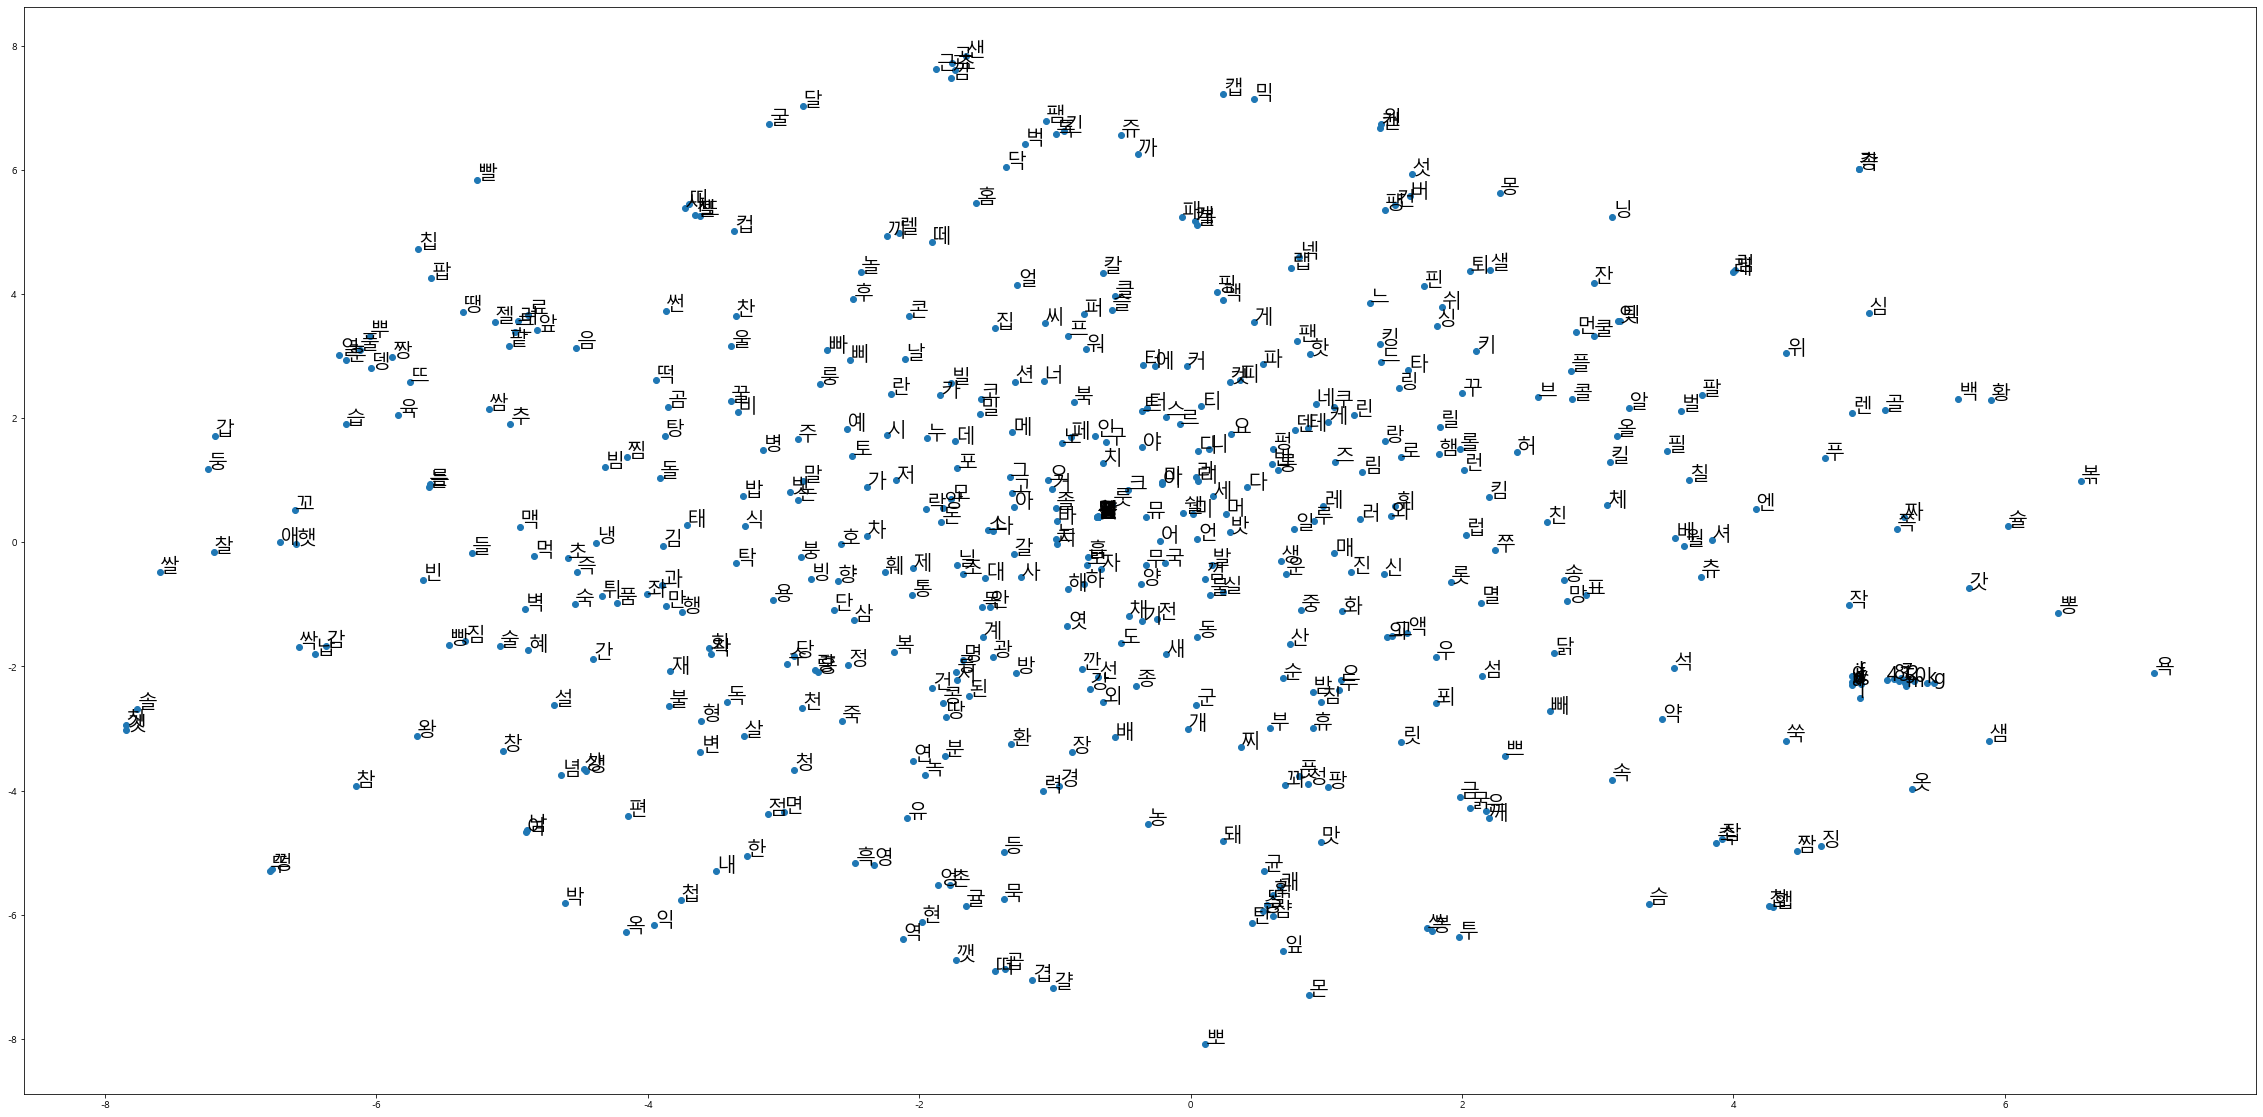

In [25]:
# 그리고자 하는 모델 입력
w2v = wvF
# 500개의 단어에 대해서만 시각화
word_N = 500

voc = list(w2v.wv.vocab)
w2vX = w2v[voc]

ts = TSNE(n_components=2)
ts_x = ts.fit_transform(w2vX[:word_N,:])

data = pd.DataFrame(ts_x, index=voc[:word_N], columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data['x'], data['y'])

for word, pos in data.iterrows():
    ax.annotate(word, pos, fontsize=20)
plt.show()